<a href="https://colab.research.google.com/github/Dienadf/esg-investor-segmentation/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/base_clients_fidelity_simule.csv")

#Listes des variables ESG à normaliser
esg_vars=["%_Encours_ESG", "Nb_Fonds_Labellises", "Vote_AG_ESG","Engagement_Campagne", "Croissance_Encours_ESG", "Interet_Exprime"]

#Normalisation
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

for var in esg_vars:
    df[f"{var}_norm"] = min_max_normalize(df[var]).round(3)

#Pondération définies (total=100%)
weights = {
    "%_Encours_ESG_norm": 0.30,
    "Nb_Fonds_Labellises_norm": 0.15,
    "Vote_AG_ESG_norm": 0.10,
    "Engagement_Campagne_norm": 0.10,
    "Croissance_Encours_ESG_norm": 0.20,
    "Interet_Exprime_norm": 0.15
    }

#Calcul du score ESG pondéré
df["Score_ESG_Pondere"] = sum(df[col] * weight for col, weight in weights.items())
df["Score_ESG_Pondere"] = df["Score_ESG_Pondere"].round(3)

print(df[["Client_ID", "Score_ESG_Pondere"]].head())

#Exportation de mon nouveau fichier CSV avec note ESG pondérée
df.to_csv("clients_esg_avec_score.csv", index=False)

  Client_ID  Score_ESG_Pondere
0      C001              0.366
1      C002              0.484
2      C003              0.723
3      C004              0.569
4      C005              0.469


In [ ]:
#Rechargement de la nouvelle bdd enrichie
df=pd.read_csv("/content/clients_esg_avec_score.csv")


In [ ]:
#Selection des variables pour la segmentation
from sklearn.cluster import KMeans
X = df [["Score_ESG_Pondere", "Fidelite_Score", "Churn", "Upsell_Potentiel"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df["Segment"] = kmeans.fit_predict(X)

segment_mapping = {
    0: "Champions ESG",
    1: "Clients à convaincre",
    2: "A Potentiel Latent"
}

df["Profil_Segment"]= df["Segment"].map(segment_mapping)

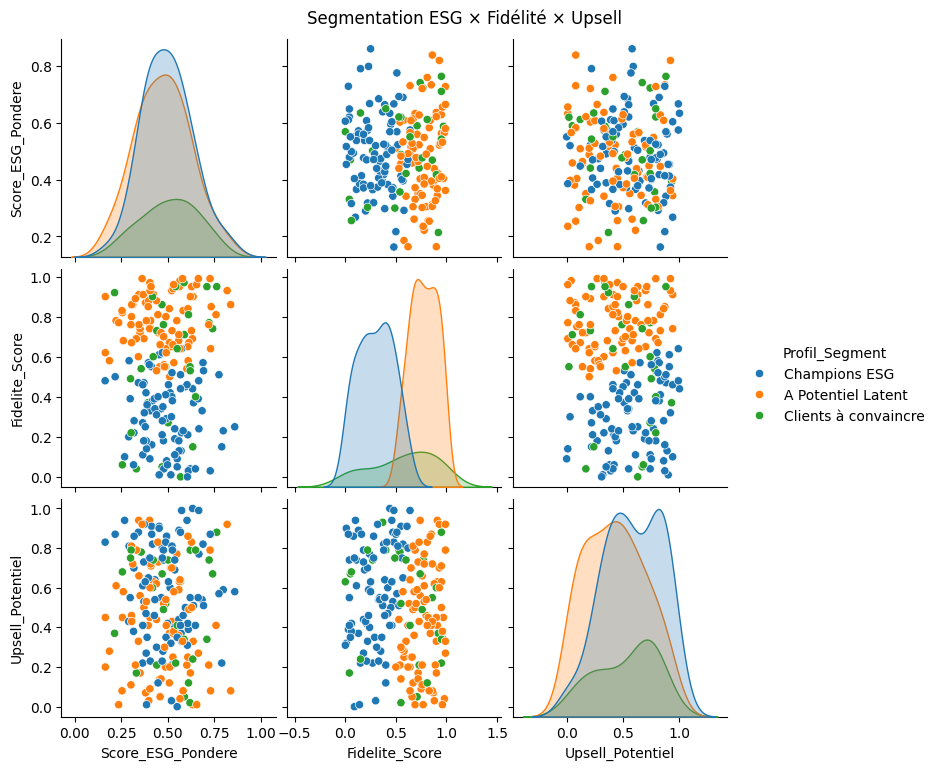

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Analyse par type d'investisseur et par pays
profil_par_type = df.groupby(["Profil_Segment", "Type_Investisseur"])[
    ["Score_ESG_Pondere", "Fidelite_Score", "Churn", "Upsell_Potentiel"]
].mean().round(2).reset_index()

profil_par_pays = df.groupby(["Profil_Segment", "Pays"])[
    ["Score_ESG_Pondere", "Fidelite_Score", "Churn", "Upsell_Potentiel"]
].mean().round(2).reset_index()

#Visualisation
sns.pairplot(df, hue="Profil_Segment", vars=["Score_ESG_Pondere", "Fidelite_Score", "Upsell_Potentiel"])
plt.suptitle("Segmentation ESG × Fidélité × Upsell", y=1.02)
plt.show()


In [ ]:
#Sauvegarde
df.to_csv("clients_esg_segmentes.csv", index=False)
profil_par_type.to_csv("profils_par_type.csv", index=False)
profil_par_pays.to_csv("profils_par_pays.csv", index=False)